### Importing Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

# Reading the data

In [52]:
df = pd.read_csv("C:/Users/Vinay Nandal/Downloads/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [53]:
# checking for null values

df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [54]:
# understanding data

df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [55]:
# Preping the data and only taking company name

df["Company"] = df["CarName"].apply(lambda x: x.split(' ')[0])
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [56]:
# deleting the Column CarName

del df['CarName']
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [57]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'Company'],
      dtype='object')

# Data Cleaning

In [58]:
# checking the unique values in company

df.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

we saw that there are spelling mistakes and some of the company names are same.

In [59]:
# correcting the data

df["Company"][df["Company"]=="toyouta"]= "toyota"
df["Company"][df["Company"]=="maxda"]= "mazda"
df["Company"][df["Company"]=="Nissan"]= "nissan"
df["Company"][df["Company"]=="porcshce"]= "porsche"
df["Company"][df["Company"].isin(["vokswagen","vw"])]= "volkswagen"

In [60]:
# now check again for unique values

df.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# Data Exploration

In [61]:
# now, we will check the price column because it is the dependent variable

df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1f4aed1e8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f4aed1ee50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f4aed1e5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f4aed28430>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f4aed28700>],
 'means': []}

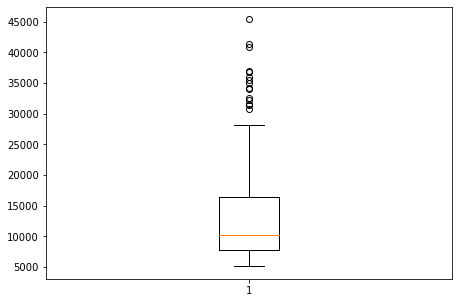

In [62]:
# check for outliers in the price column

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.boxplot(df.price)

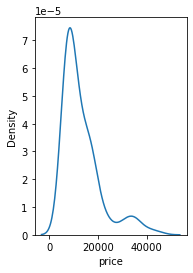

In [63]:
# check for distribution

plt.subplot(1,2,2)
sns.distplot(df.price, hist=False)
plt.show()

<AxesSubplot:xlabel='carbody', ylabel='price'>

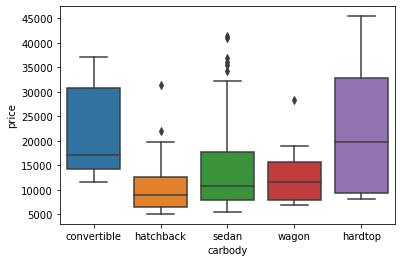

In [64]:
#checking for outliers in carbody with price

sns.boxplot(x=df.carbody,y=df.price)

<AxesSubplot:xlabel='carbody', ylabel='count'>

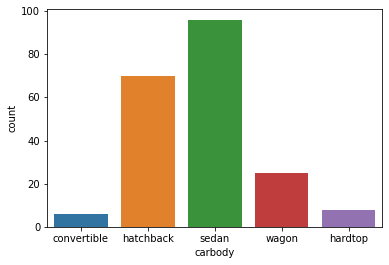

In [65]:
# checking for count of carbody and company

sns.countplot(df.carbody)

Sedan have the highest number of car bodies

<AxesSubplot:xlabel='count', ylabel='Company'>

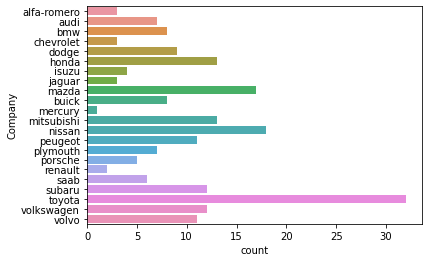

In [66]:
sns.countplot(data=df,y= "Company")

Toyota have the highest count

In [67]:
df.Company.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: Company, dtype: int64

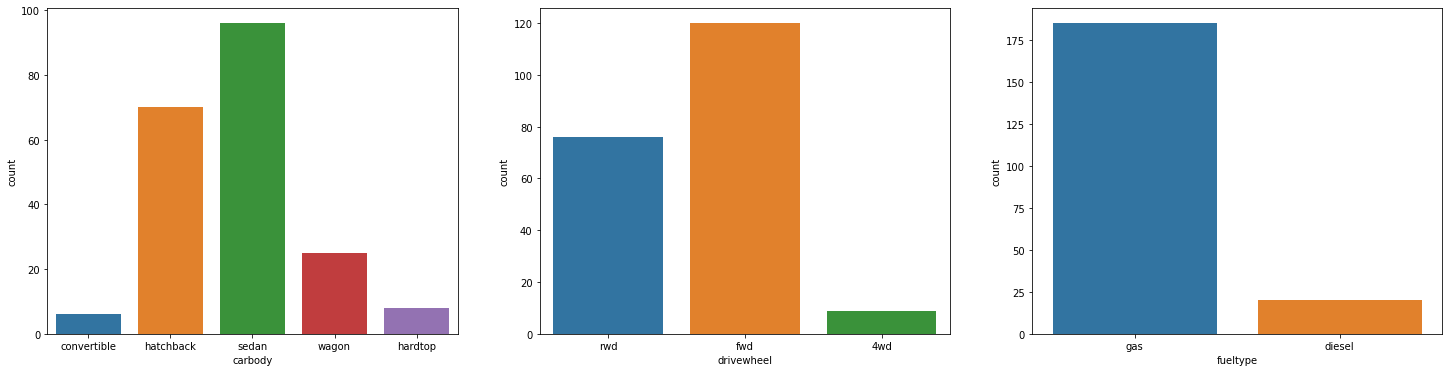

In [68]:
# checking for most used aspects

plt.figure(figsize=(25, 6))

plt.subplot(1,3,3)
sns.countplot(df.fueltype)

plt.subplot(1,3,2)
sns.countplot(df.drivewheel)

plt.subplot(1,3,1)
sns.countplot(df.carbody)

plt.show()

Sedan , Forward drivewheel and gas are most used in the dataset.

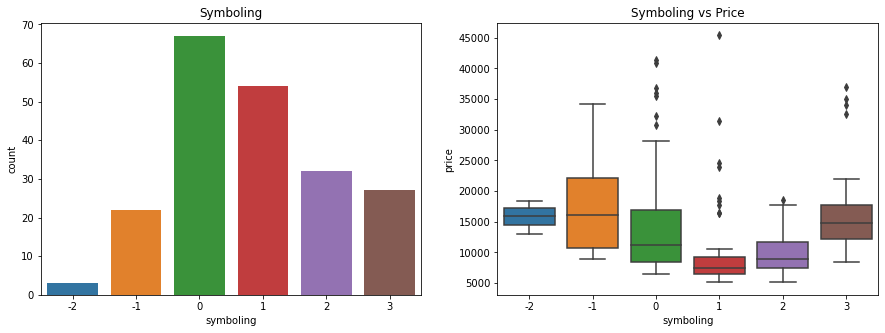

In [69]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Symboling')
sns.countplot(df.symboling)

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=df.symboling, y=df.price)

plt.show()

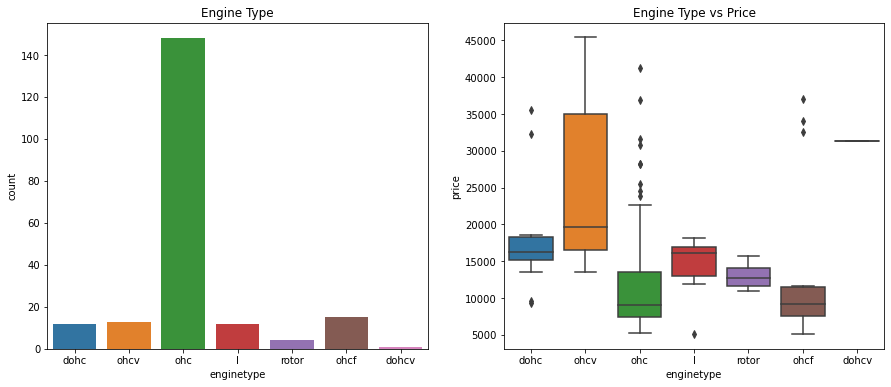

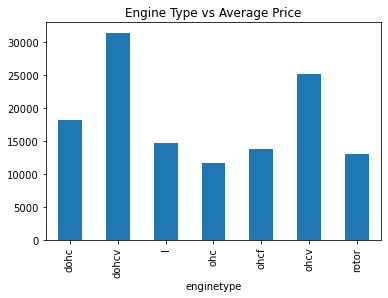

In [70]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Engine Type')
sns.countplot(df.enginetype)

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=df.enginetype, y=df.price)

plt.show()

df.groupby("enginetype").price.mean().plot(kind="bar")
plt.title('Engine Type vs Average Price')
plt.show()

AS we can ohc is the highest used enginetype but its average price is lowest.

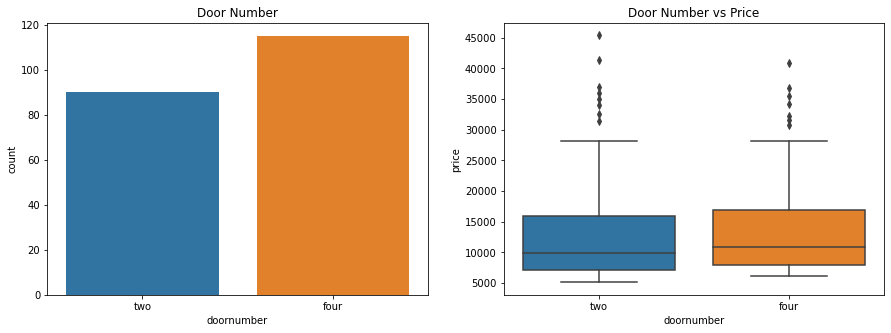

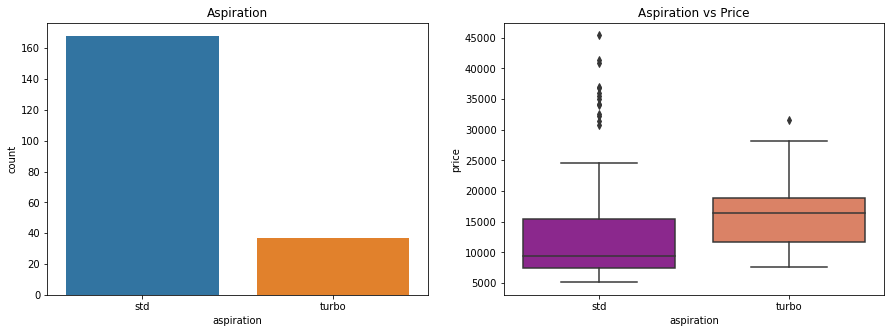

In [71]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number')
sns.countplot(df.doornumber)

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=df.doornumber, y=df.price)

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration')
sns.countplot(df.aspiration)

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=df.aspiration, y=df.price, palette=("plasma"))

plt.show()

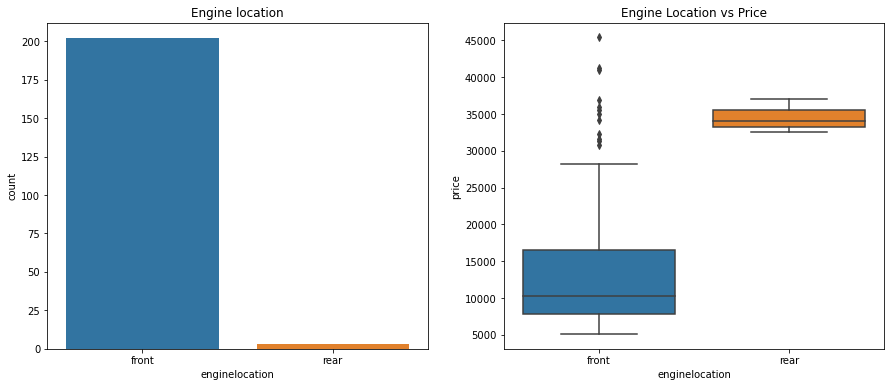

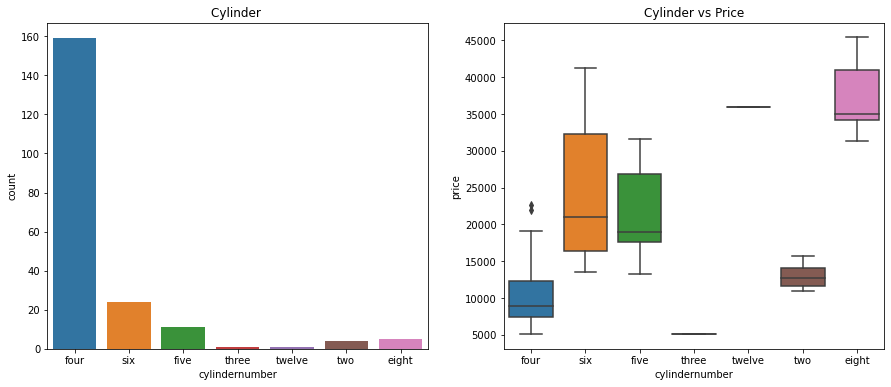

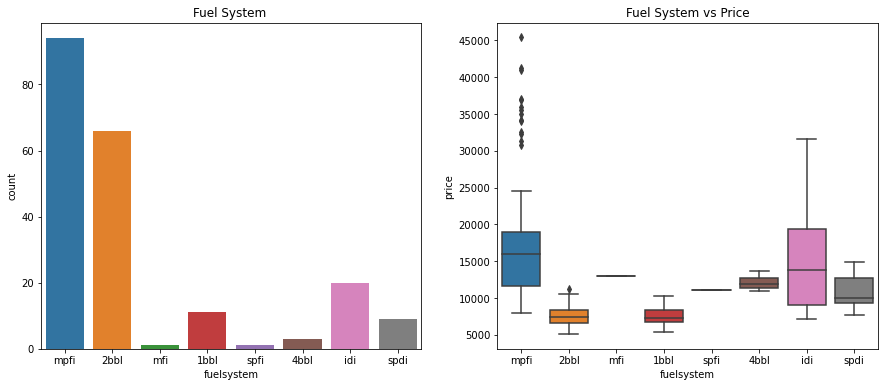

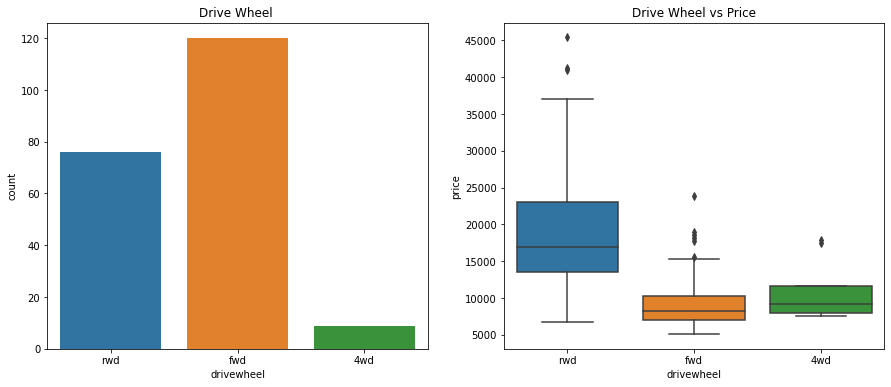

In [72]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Engine location')
sns.countplot(df.enginelocation)

plt.subplot(1,2,2)
plt.title('Engine Location vs Price')
sns.boxplot(x=df.enginelocation, y=df.price)

plt.show()

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Cylinder ')
sns.countplot(df.cylindernumber)

plt.subplot(1,2,2)
plt.title('Cylinder vs Price')
sns.boxplot(x=df.cylindernumber, y=df.price)

plt.show()

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Fuel System ')
sns.countplot(df.fuelsystem)

plt.subplot(1,2,2)
plt.title('Fuel System vs Price')
sns.boxplot(x=df.fuelsystem, y=df.price)

plt.show()

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Drive Wheel ')
sns.countplot(df.drivewheel)

plt.subplot(1,2,2)
plt.title('Drive Wheel vs Price')
sns.boxplot(x=df.drivewheel, y=df.price)

plt.show()

- It can be noted that Engine location make slight influence in price.
- Most of the car sold was 4 cylinder and its price is very less while 87 cylinder price is very high.
- The fuel system has significant impact on price.
- A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel

<AxesSubplot:xlabel='curbweight', ylabel='price'>

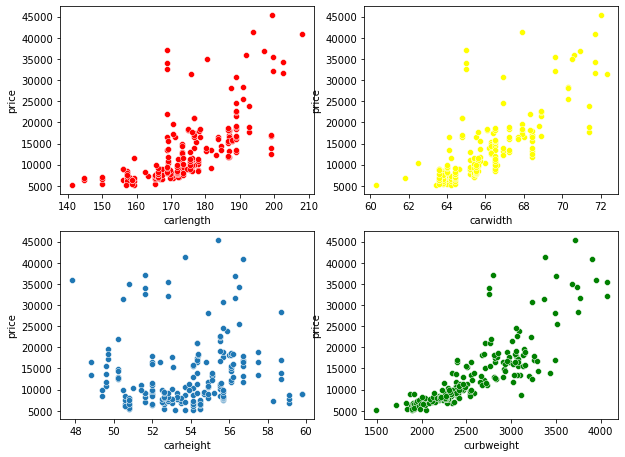

In [73]:
plt.figure(figsize=(10,20))
plt.subplot(5,2,1)
sns.scatterplot(x=df.carlength,y=df.price,color="red")
plt.subplot(5,2,2)
sns.scatterplot(x=df.carwidth,y=df.price,color="yellow")
plt.subplot(5,2,3)
sns.scatterplot(x=df.carheight,y=df.price)
plt.subplot(5,2,4)
sns.scatterplot(x=df.curbweight,y=df.price,color="green")

- The height have the least impact on price.
- On the other hand, car length, width, weight have a significant impact on price.

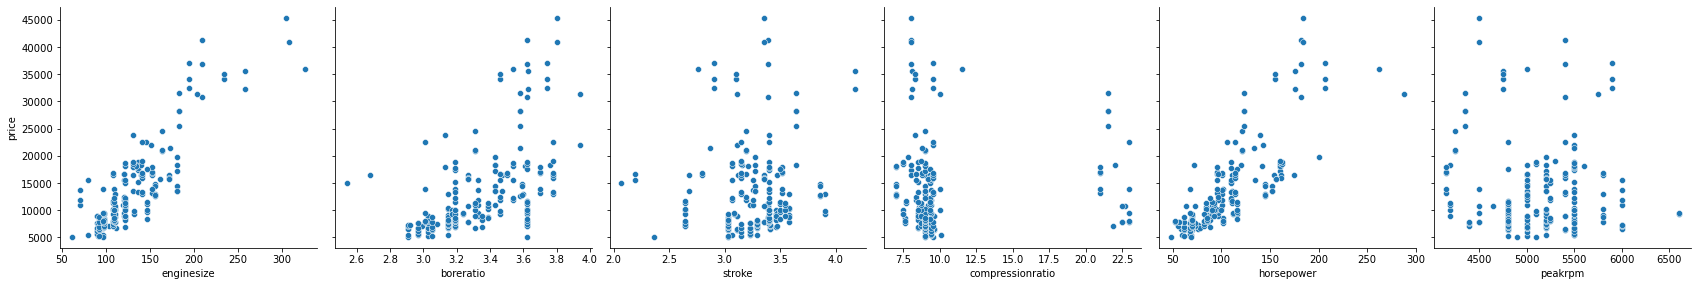

In [74]:
sns.pairplot(df, x_vars=['enginesize', 'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm'], y_vars='price',size=4, aspect=1, kind='scatter')

- As its seen compressionration and peakrpm have negative correlation with price.
- But enginesize, boreratio, stroke and horsepower have positive correlation with price.

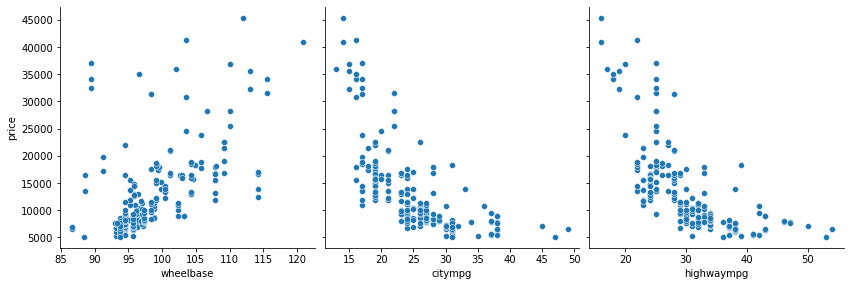

In [75]:
sns.pairplot(df, x_vars=['wheelbase', 'citympg', 'highwaympg'], y_vars='price',size=4, aspect=1, kind='scatter')

- Wheelbase have positive correlation but citymap and highwaympg have negative correlation

In [76]:
df['fueleconomy'] = (0.55 * df['citympg']) + (0.45 * df['highwaympg'])

<AxesSubplot:xlabel='fueleconomy', ylabel='price'>

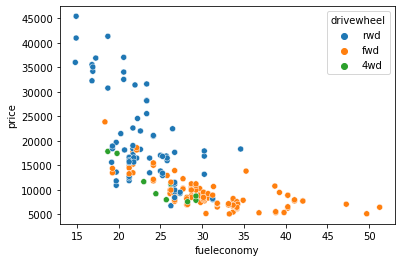

In [77]:
sns.scatterplot(x=df['fueleconomy'],y=df['price'],hue=df['drivewheel'])

- as seen fueleconomy have a significant negative correlation.

In [78]:
# converting the price into categorical variables

def pricerange(price):
    if price<10000:
        return "Low"
    elif price <20000:
        return "Medium"
    else:
        return "High"

In [79]:
df["range"]=  df["price"].apply(pricerange)

<AxesSubplot:xlabel='fuelsystem,drivewheel'>

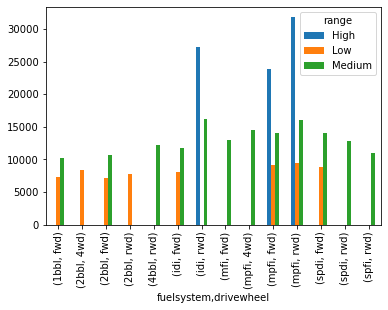

In [80]:
df.groupby(['fuelsystem','drivewheel','range']).price.mean().unstack(fill_value=0).plot(kind="bar")

In [81]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093,0.013872
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,-0.003257
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,-0.508136
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920,-0.691472
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325,-0.663419
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336,-0.076356
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305,-0.781535
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145,-0.669464
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173,-0.589898
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443,-0.043281


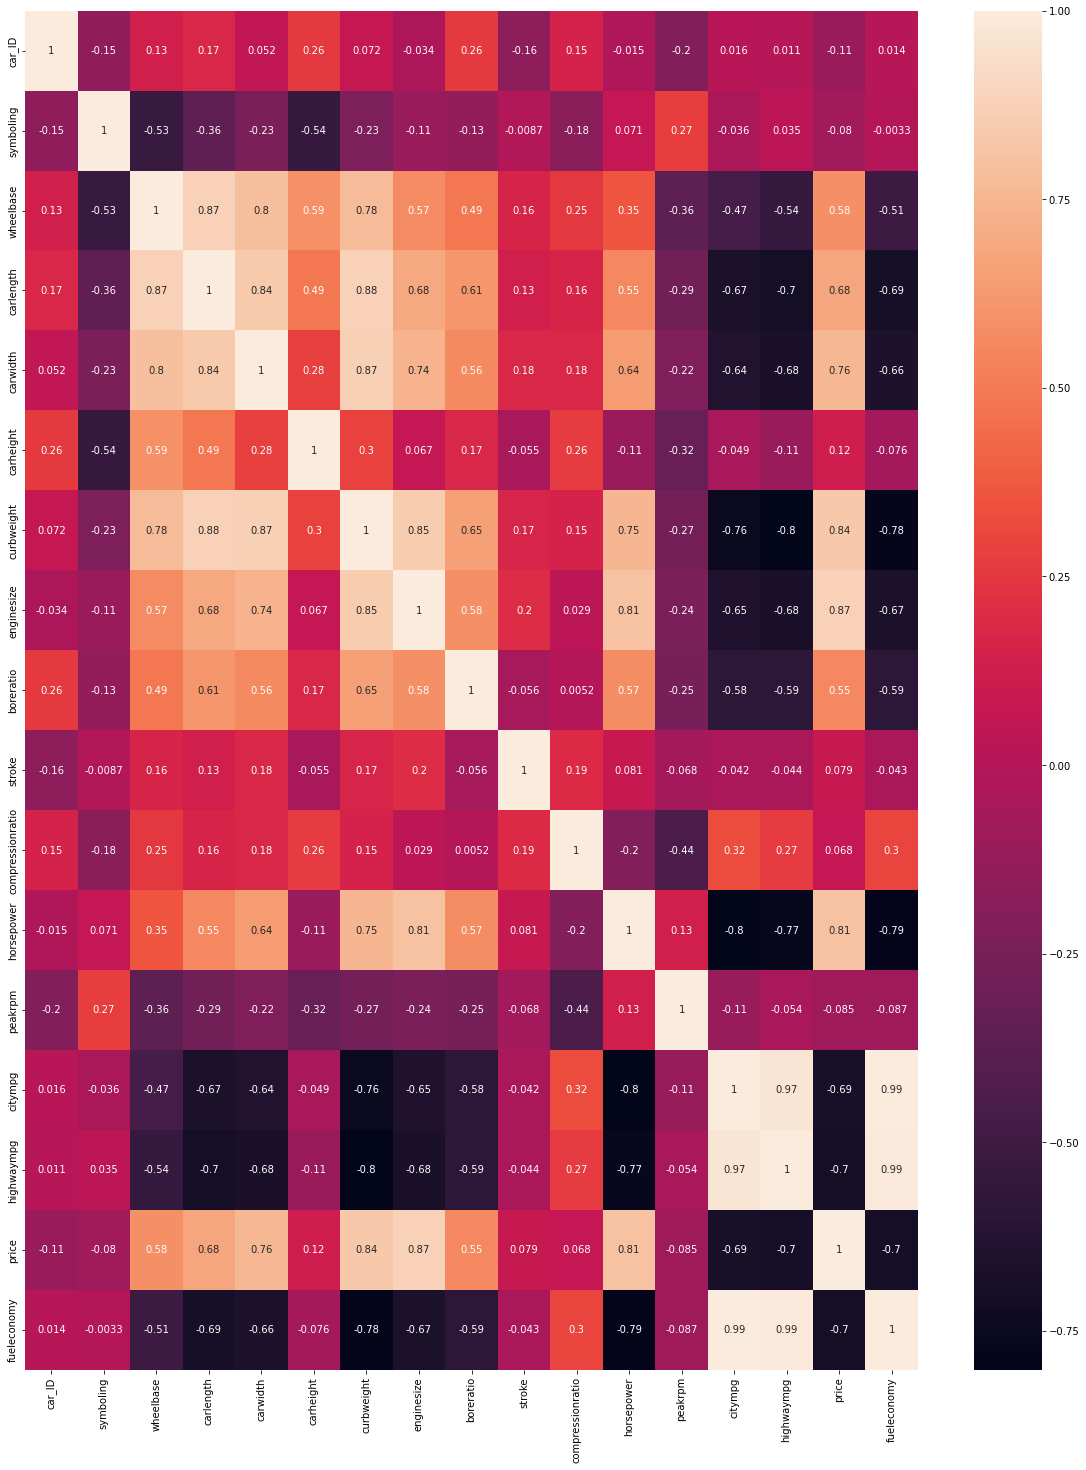

In [82]:
# correlation with the heatmap

plt.figure(figsize = (20, 25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Columns with high correlation
- Range
- Engine Type
- Fuel type
- Car Body
- Aspiration
- Cylinder Number
- Drivewheel
- Curbweight
- Car Length
- Car width
- Engine Size
- Boreratio
- Horse Power
- Wheel base
- Fuel Economy

#  Encoding

In [83]:
df_new = df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'range']]

In [84]:
# creating dummy variables

def dummies(x,data):
    temp = pd.get_dummies(data[x], drop_first = True)
    data = pd.concat([data, temp], axis = 1)
    data.drop([x], axis = 1, inplace = True)
    return data
# Applying the function to the df_new

df_new = dummies('fueltype',df_new)
df_new = dummies('aspiration',df_new)
df_new = dummies('carbody',df_new)
df_new = dummies('drivewheel',df_new)
df_new = dummies('enginetype',df_new)
df_new = dummies('cylindernumber',df_new)
df_new = dummies('range',df_new)

In [85]:
df_new.columns

Index(['price', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'fueleconomy', 'carlength', 'carwidth', 'gas', 'turbo',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two', 'Low', 'Medium'],
      dtype='object')

In [86]:
df_new.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Low,Medium
0,13495.0,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,0,1
1,16500.0,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,0,1
2,16500.0,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,0,1
3,13950.0,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,0,1
4,17450.0,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,0,1


In [87]:
# Spliting data into train and test

X= df_new.iloc[:,1:]
y= df_new[["price"]]


In [88]:
X.columns

Index(['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'fueleconomy', 'carlength', 'carwidth', 'gas', 'turbo', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc',
       'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve',
       'two', 'Low', 'Medium'],
      dtype='object')

# Training the model

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70, random_state = 100)

In [90]:
# creating an object of linear regression

lm = LinearRegression()

In [92]:
# fit the model

lm.fit(X_train,y_train)

LinearRegression()

In [95]:
# see the params, make predictions (train,test)

print(lm.coef_)
print(lm.intercept_)

[[ 6.79657892e+01  2.26540793e+00  2.30959508e+01 -3.80762829e+03
   1.36946590e+02  1.39306054e+02  5.46245709e+01 -8.97179169e+01
  -2.92830400e+03 -2.52097845e+03 -4.27240553e+03 -4.25189426e+03
  -3.67332421e+03 -4.18071702e+03 -1.22062238e+03 -6.48142399e+02
  -1.54167421e+04  3.04449687e+03  2.60816433e+03  3.48690611e+03
  -5.15017230e+02  1.42947537e+03 -2.51508544e+03 -1.92696409e+03
  -4.90838970e+03 -1.97403772e+02 -1.32821873e+04  1.42947537e+03
  -9.83415965e+03 -9.03982651e+03]]
[5036.64598302]


# Model Prediction

In [97]:
y_pred = lm.predict(X_test)

# r2_Score

In [98]:
r2_score(y_test, y_pred)

0.9302804836379271

In [99]:
r2_score(y_train,lm.predict(X_train))

0.953995074096657

AttributeError: module 'matplotlib.pyplot' has no attribute 'Xlabel'

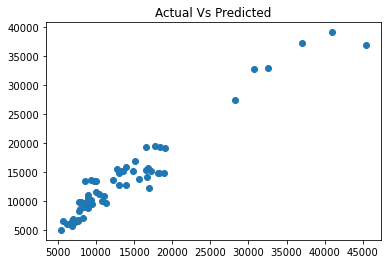

In [100]:
## Fitting Actual Vs Predicted

plt.scatter(y_test,y_pred)
plt.title("Actual Vs Predicted")
plt.Xlabel("Actual")
plt.ylabel("Predicted")

# OLS model and VIF

In [103]:
# add a constant and use ordinary least squared method

X_train = sm.add_constant(X_train) #Adding the constant
lm =sm.OLS(y_train,X_train).fit()

In [104]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     80.80
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           1.46e-62
Time:                        15:42:59   Log-Likelihood:                -1263.9
No. Observations:                 143   AIC:                             2588.
Df Residuals:                     113   BIC:                             2677.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5036.6460   1.38e+04      0.365      0.716   -2.23e+04    3.24e+04
wheelbase      67.9658     87.767      0.774      0.440    -105.916     241.848
curbweight      2.2654      1.761      1.287      0.201      -1.222       5.753
enginesize     23.0960     23.702      0.974      0.332     -23.862      70.054
boreratio   -3807.6283   1936.771     -1.966      0.052   -7644.720      29.464
horsepower    136.9466     19.205      7.131      0.000      98.898     174.995
fueleconomy   139.3061     73.100      1.906      0.059      -5.519     284.131
carlength      54.6246     52.881      1.033      0.304     -50.142     159.391
carwidth      -89.7179    256.539     -0.350      0.727    -597.968     418.532
gas         -2928.3040   1139.914     -2.569      0.012   -5186.679    -669.929
turbo       -2520.9785    761.999     -3.308      0.001   -4030.635   -1011.321
hardtop     -4272.4055   1848.795     -2.311      0.023   -7935.203    -609.608
hatchback   -4251.8943   1457.564     -2.917      0.004   -7139.591   -1364.197
sedan       -3673.3242   1529.129     -2.402      0.018   -6702.804    -643.844
wagon       -4180.7170   1618.783     -2.583      0.011   -7387.818    -973.616
fwd         -1220.6224    936.290     -1.304      0.195   -3075.581     634.336
rwd          -648.1424   1095.696     -0.592      0.555   -2818.913    1522.628
dohcv       -1.542e+04   4032.594     -3.823      0.000   -2.34e+04   -7427.446
l            3044.4969   1263.823      2.409      0.018     540.635    5548.359
ohc          2608.1643    955.538      2.730      0.007     715.072    4501.257
ohcf         3486.9061   1464.607      2.381      0.019     585.255    6388.557
ohcv         -515.0172   1197.277     -0.430      0.668   -2887.038    1857.004
rotor        1429.4754   1919.542      0.745      0.458   -2373.484    5232.435
five        -2515.0854   2567.268     -0.980      0.329   -7601.307    2571.136
four        -1926.9641   2976.865     -0.647      0.519   -7824.671    3970.743
six         -4908.3897   2017.818     -2.433      0.017   -8906.051    -910.729
three        -197.4038   4175.983     -0.047      0.962   -8470.779    8075.971
twelve      -1.328e+04   3211.211     -4.136      0.000   -1.96e+04   -6920.200
two          1429.4754   1919.542      0.745      0.458   -2373.484    5232.435
Low         -9834.1597   1269.991     -7.743      0.000   -1.24e+04   -7318.078
Medium      -9039.8265    973.914     -9.282      0.000    -1.1e+04   -7110.327
==============================================================================
Omnibus:                       30.709   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.202
Skew:                           0.884   Prob(JB):                     5.70e-16
Kurtosis:                       5.943   Cond. N

The Score is 95 percent so this is a good model.